<img src="img/banniere.jpg" />

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import des donnees:
data = pd.read_csv("datas/billets_complet.csv", sep = ',')

# Visualisation des clusters

In [3]:
# Création du df de test 
cluster_df = data

In [4]:
# préparation des données pour le clustering
X = data.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering par K-means
km = KMeans(n_clusters=2)
km.fit(X_scaled)
x_km = km.fit_transform(cluster_df[["diagonal","height_left","height_right","margin_low","margin_up","length"]]) 

# Récupération des clusters attribués à chaque individu
clusters_km = km.labels_

# Création de colonne dans cluster_df
cluster_df["cluster_km"] = km.labels_


In [5]:
centroides_km = km.cluster_centers_
print(centroides_km)

[[171.89863354 104.19312629 104.14503106   5.24120064   3.3479089
  111.59026915]
 [171.98684366 103.95183874 103.81357915   4.12270846   3.05818092
  113.1953294 ]]


In [6]:

# Clustering par projection des individus sur le premier plan factoriel:
pca_km = decomposition.PCA(n_components=3).fit(cluster_df[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_km = PCA(n_components=3).fit_transform(cluster_df[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
centroides_km_projected = pca_km.transform(centroides_km)

In [7]:
# tableau de contingeance
# is_genuine diagonal height_left height_right margin_low margin_up length

cluster_df.pivot_table(index="is_genuine", columns="cluster_km", aggfunc=len, fill_value=0)


diagonal      height_left      height_right      length       \
cluster_km        0    1           0    1            0    1      0    1   
is_genuine                                                                
False           481   19         481   19          481   19    481   19   
True              2  998           2  998            2  998      2  998   

           margin_low      margin_up       
cluster_km          0    1         0    1  
is_genuine                                 
False             481   19       481   19  
True                2  998         2  998

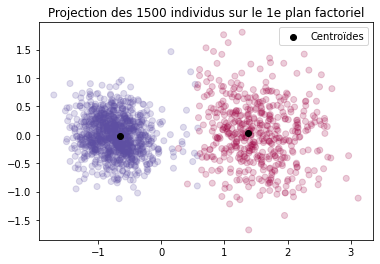

In [8]:

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=cluster_df.cluster_km.astype(np.float), cmap = 'Spectral', alpha=.2)
plt.scatter(centroides_km_projected[:,0],centroides_km_projected[:,1],color="black",label="Centroïdes")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.legend()
plt.show(block=False)

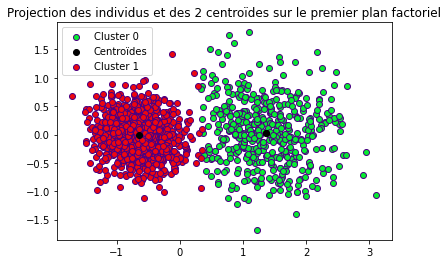

is_genuine  False  True
row_0                  
0             481     2
1              19   998


In [9]:
# Graphique:
plt.figsize=(20,10)
for couleur,k in zip(["#07ed31","#ed070f"],[0,1]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur,edgecolors="indigo",label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroides_km_projected[:,0],centroides_km_projected[:,1],color="black",label="Centroïdes")
plt.title("Projection des individus et des {} centroïdes sur le premier plan factoriel".format(len(centroides_km)))
plt.show()

#Verification de la classification: Matrice de confusion:
km_matrix = pd.crosstab(clusters_km,cluster_df["is_genuine"])
print(km_matrix)

# Modelisation KMEANS

In [10]:
# Import des donnees:
df = pd.read_csv("datas/billets_complet.csv", sep=',')
df.is_genuine = LabelEncoder().fit_transform(df['is_genuine'])
X = df.drop(columns='is_genuine')
y = df.is_genuine

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=150)

In [12]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Clustering par K-means
modele = KMeans(n_clusters=2, init = 'k-means++',max_iter=300,n_init=10,random_state=150)
modele.fit(X_train,y_train)

KMeans(n_clusters=2, random_state=150)

In [14]:
modele.cluster_centers_

array([[-0.22721901,  0.6012622 ,  0.70932189,  1.14525676,  0.87143025,
        -1.21786546],
       [ 0.11023497, -0.29170146, -0.34412646, -0.55561961, -0.42277309,
         0.59084562]])

In [15]:
y_pred = modele.predict(X_test) 

In [16]:
def plot_confusion_matrix(cf_matrix):
    plt.figure(figsize=(7, 7))
    ['False Pos','True Pos','True Neg','False Neg']
    group_names = ['True Negative','False Negative','False Positive','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Prédiction avec les données normalisées")
    plt.show()

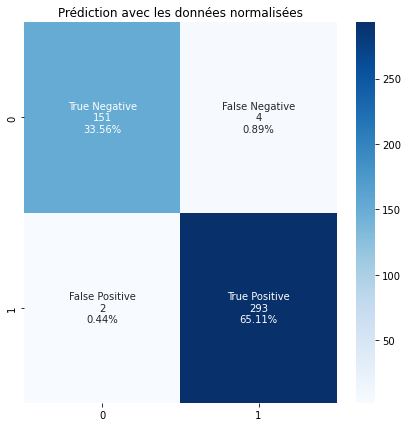

In [17]:
res = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(res)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Precision : {round(precision_score(y_test, y_pred)*100,2)} %")
print(f"Recall    : {round(recall_score(y_test, y_pred)*100,2)} %")
print(f"Accuracy  : {round(accuracy_score(y_test, y_pred)*100,2)} %")
print(f"F1 score  : {round(f1_score(y_test, y_pred)*100,2)} %")

Precision : 98.65 %
Recall    : 99.32 %
Accuracy  : 98.67 %
F1 score  : 98.99 %


In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       155
           1       0.99      0.99      0.99       295

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.99       450
weighted avg       0.99      0.99      0.99       450



# Test sur échantillon et prediction

In [21]:
# import du df de test
new = pd.read_csv('datas/billets_production.csv')

In [22]:
### Variables explicatives
X_new = new.drop(columns='id')
X_new = scaler.transform(X_new)

In [23]:
y = modele.predict(X_new)

In [24]:
for i, k in zip( y , new["id"]):
    if i == True : 
       print("Le billet {}".format(k),"semble vrai")
    else : 
        print("Le billet {}".format(k),"semble faux ")


Le billet A_1 semble faux 
Le billet A_2 semble faux 
Le billet A_3 semble faux 
Le billet A_4 semble vrai
Le billet A_5 semble vrai
